# Naive Bayes Classifier
Naive Bayes Classifier is a probabilistic machine learning model used for classification. It is based on the popular *Bayes Theorem* of conditional probabilities.

## Bayes Theorem
Mathematically, the Bayes Theorem is stated as follows.

${P(A\mid B)=\large{\frac {P(B\mid A)\,P(A)}{P(B)}}}$

where,

$P(B)$ is the probability of an event $B$ (evidence)  
$P(A)$ is the probability of and event $A$ (prior)  
$P(B\mid A)$ the probability of $B$ given $A$ has occured (likelihood)  
$P(A\mid B)$ the probability of $A$ given $B$ has occured (posterior)

Let us look at an example to understand this formula. Suppose we have a dataset of 100 people and we know their *sex* and whether they are a *smoker*. The following is a summary of the data.
 
|  Type/Sex  | Female | Male | Total|
|------------|-------:|-----:|-----:|
| Smoker     |     10 |   30 |   40 |
| Non-Smoker |     35 |   25 |   60 |
| Total      |     45 |   55 |  100 |

Using this data, we can estimate the probability of a random person being a *male* or a *female* as follows.

$P(Sex=Male) = \large\frac{55}{100}\small = 0.55$  
$P(Sex=Female) = \large\frac{45}{100}\small = 0.45$

Similarly, we can estimate the probability of a random person being a *smoker* or a *non-smoker* as follows.

$P(Type=Smoker) = \large\frac{40}{100}\small = 0.4$  
$P(Type=Non-smoker) = \large\frac{60}{100}\small = 0.6$

Looking only at *smokers* data, we can estimate probabilities of *male* or *female* as follows.

$P(Sex=Male\mid Type=Smoker) = \large\frac{30}{40}\small = 0.75$  
$P(Sex=Female\mid Type=Smoker) = \large\frac{10}{40}\small = 0.25$

Similarly, looking at only *non-smokers* data, we can estimate probabilities of *male* or *female* as follows.

$P(Sex=Male\mid Type=Non-smoker) = \large\frac{25}{60}\small = 0.42$  
$P(Sex=Female\mid Type=Non-smoker) = \large\frac{35}{60}\small = 0.58$

With above probabilities calculated, we can now predict whether someone is a smoker or non-smoker if we know their sex.

If we know that a random person is *male*, the probability that he is a *smoker* can be calculated by using the Bayes Theorem as follows.

${P(Type=Smoker\mid Sex=Male)=\large{\frac {P(Sex=Male\mid Type=Smoker)\,P(Type=Smoker)}{P(Sex=Male)}}}=\large\frac{0.75*0.4}{0.55}\small=0.54$  
${P(Type=Non-smoker\mid Sex=Male)=\large{\frac {P(Sex=Male\mid Type=Non-smoker)\,P(Type=Non-smoker)}{P(Sex=Male)}}}=\large\frac{0.42*0.6}{0.55}\small=0.46$

Since for the given person, the probability of being a smoker is higher than being a non-smoker, we can predict that the given person is a *smoker*.

Note that before we knew the *sex* of the person, the probability of that person being a *smoker* was $0.4$. But when we knew that his sex was *male*, this new piece of information or *evidence* helped us update his probability of being a *smoker* to $0.54$. Thus, Bayes Theroem is used to update our *prior* knowledge about something in the light of new *evidence*.

## Classification and The *Naive* Assumption
We can extend the Bayes Theorm to predict a *label* $y$ for a given set of *features* $X$ as follows.

${P(y\mid X)=\large{\frac {P(X\mid y)\,P(y)}{P(X)}}}$

Here, $X = (x_1,x_2,x_3,.....,x_n)$ is a set of $n$ *features*.

The *Naive Bayes Classifier* assumes that each feature in $X$ is *independent* of each other. This assumption is not a very practical one since the features are generally not totally independent. However, this *naive* assumption of independence makes the problem simpler to solve as the probabilities involving this set of features can be broken down as follows.

$P(y|x_1,...,x_n) = \large\frac{ P(x_1|y)P(x_2|y)...P(x_n|y)P(y)}{P(x_1)P(x_2)...P(x_n)}$

This can be written as

$P(y|x_1,...,x_n) = \large\frac{P(y)\prod_{i=1}^{n}P(x_i|y)}{\prod_{i=1}^{n}P(x_i)}$

For a classification task, we'll need to calculate the probabilities of each class $y$  for a given set of features $(x_1,...,x_n)$, find out which class has the *highest probability*, and declare that class as the prediction. This means that for every *class probability* we're calculating for a given set of features, the *denominator* in the above equation will remain constant. And since we're trying to find the class with highest probability, the comparison will not be affected if we remove the denominator term to make the equation as follows.

$P(y|x_1,...,x_n)\propto P(y)\prod_{i=1}^{n}P(x_i|y)$

Putting the concept of finding the class $y$ with the highest probability in mathematical terms, we can say that the predicted class is given by the equation below.

$y = argmax_{y} P(y)\prod_{i=1}^{n}P(x_i|y)$

## *Spam* vs *Not Spam* Classification
Naive Bayes Classifiers are popularly used in text classification tasks because of their better performance in text related tasks even with small training data. We'll explore text classification with reference to an example of classifying messages as *spam* or *not spam*.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
plt.rcParams['figure.figsize'] = 8, 6
plt.style.use('ggplot')

In [3]:
spam = pd.read_csv('../resources/spam.csv')
spam.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
text     5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


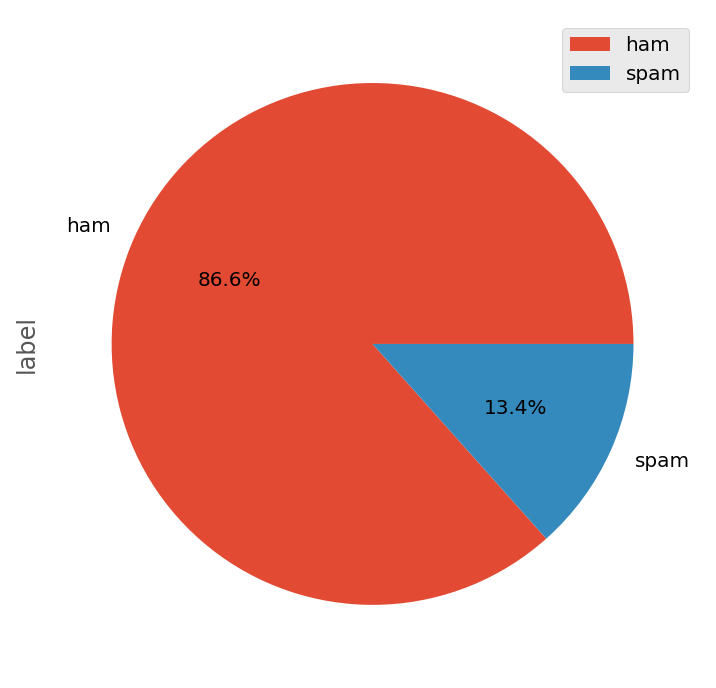

In [5]:
spam['label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend()

In [6]:
# Convert label to numbers
label_map = {'ham': 0, 'spam': 1}
spam['label'] = spam['label'].map(label_map)
spam.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Feature Extraction
Our features are in the form of text. But we cannot work with text directly when using machine learning algorithms. Therefore, we need to convert them into numbers. As we saw in previous classes, our features were a set of vectors made up of numbers, and our algorithms took vectors of numbers as input. So, we need to convert each text message into a fixed-length vector.

One popular method of thinking about text document is the *Bag of Words* model. This model ignores the order of words and focuses on *count* or *frequency* of certain sets of words.

#### Count Vector
Count Vector is a vector representation of text based on count of words in the text. For example, if we want to convert the text `I love to eat. I love to sleep.`, we can count the occurence of each word and make a vector of it as follows.

`eat`-----> `1`  
`i`--------> `2`  
`love`----> `2`  
`sleep`---> `1`  
`to`-------> `2`  

Thus, the count vector representation would be `[1, 2, 2, 1, 2]`. But this vector needs to be of fixed length for every text we choose to vectorize. For this we choose a certain set of words as *vocabulary words* and count the occurence of only those words. Let us see an example using scikit-learn.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
text = ['The sky is full of stars.', 'The night is beautiful.', 'The moon is bright.']
vectorizer = CountVectorizer()
# build vocabulary using text
vectorizer.fit(text)
sorted(list(vectorizer.vocabulary_))

['beautiful',
 'bright',
 'full',
 'is',
 'moon',
 'night',
 'of',
 'sky',
 'stars',
 'the']

We have now built a vocabulary that contains above words. Now, we can use it to transform any text into vector representation.

In [8]:
text1 = ['The sky is blue. It is beautiful.']
vectorizer.transform(text1).toarray()

array([[1, 0, 0, 2, 0, 0, 0, 1, 0, 1]])

In [9]:
text2 =['I love night sky. But the moon is gone. The stars are twinkling. Where are the clouds?']
vectorizer.transform(text2).toarray()

array([[0, 0, 0, 1, 1, 1, 0, 1, 1, 3]])

#### TF-IDF
Count vectors are a good starting point but they are very simple. One of its drawback is that words like *the* will appear many times in a text and will have a large count that dominates other useful words. An alternative is the TF-IDF. TF-IDF stands for Term Frequency-Inverse Document Frequency. It consists of two terms:

**Term Frequency**: Term Frequency (TF) measures how frequently a term occurs in a document. For example, when a 100 word document contains the term *sky* 12 times, the TF for the word *sky* is 12/100 i.e. 0.12.

$\text{TF(t)} = \large\frac{\text{Number of times term t appears in a document}}{\text{Total number of terms in the document}}$

**Inverse Document Frequency**: Inverse Document Frequency (IDF) measures how important a term is. If a term appears frequently across many documents, it might not be that important. While computing TF, all terms are considered equally important. However, certain terms such as *is*, *of*, and *the* may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms and scale up the rare ones.

$\text{IDF(t)} = \log{\large \left(\frac{\text{Total number of documents}}{\text{Number of documents with term t in it}}\right)}$

The TF-IDF of a term is calculated as follows.

$\text{TF-IDF(t) = TF(t)*IDF(t)}$

Thus, instead of word counts, a TD-IDF vector would consist TD-IDF values of each word that makes up a vector representation. Let's see an example using scikit-learn.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = ['The sky is full of stars.', 'The night is beautiful.', 'The moon is bright.']
vectorizer = TfidfVectorizer()
# build vocabulary using text
vectorizer.fit(text)
sorted(list(vectorizer.vocabulary_))

['beautiful',
 'bright',
 'full',
 'is',
 'moon',
 'night',
 'of',
 'sky',
 'stars',
 'the']

In [11]:
text1 = ['The sky is blue. It is beautiful.']
vectorizer.transform(text1).toarray()

array([[0.51680194, 0.        , 0.        , 0.61046311, 0.        ,
        0.        , 0.        , 0.51680194, 0.        , 0.30523155]])

In [12]:
text2 =['I love night sky. But the moon is gone. The stars are twinkling. Where are the clouds?']
vectorizer.transform(text2).toarray()

array([[0.        , 0.        , 0.        , 0.2158313 , 0.36543416,
        0.36543416, 0.        , 0.36543416, 0.36543416, 0.6474939 ]])

### Model Creation
Now, that we know how to convert text to vector representation, we're ready to proceed with building our model using Naive Bayes Classifier. As we have been saying, we need to convert every text to vector representation before it can be used by our classification model. To make this easy, we'll make use of scikit-learn's *pipeline* that that combines *vectorizer* and *classifier* into one for convenience.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

X = spam['text']
y = spam['label']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [14]:
model = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', MultinomialNB())])

model.fit(Xtrain, ytrain)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [15]:
print('Train accuracy: {}'.format(model.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(model.score(Xtest, ytest)))

Train accuracy: 0.9748709894547902
Test accuracy: 0.9587443946188341


In [16]:
model.predict(['meet me at the library', 'call me soon', 'free entry', 'you have won prize', 'claim your flight discount'])

array([0, 0, 1, 1, 1])

In [17]:
model2 = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', MultinomialNB())])
model2.fit(Xtrain, ytrain)
print('Train accuracy: {}'.format(model2.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(model2.score(Xtest, ytest)))

Train accuracy: 0.9838456360780794
Test accuracy: 0.9713004484304932


In [18]:
model3 = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1, 2))),
                ('clf', MultinomialNB(alpha=0.8))])
model3.fit(Xtrain, ytrain)
print('Train accuracy: {}'.format(model3.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(model3.score(Xtest, ytest)))

Train accuracy: 0.9896791563832175
Test accuracy: 0.967713004484305


Text(0.5, 33.0, 'Predicted Label')

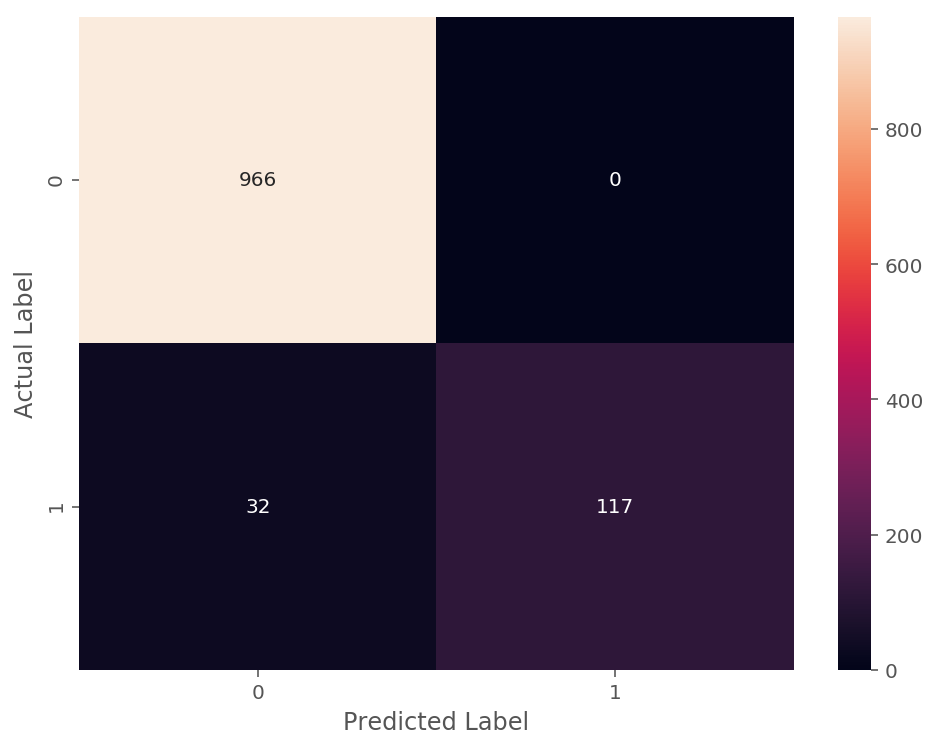

In [19]:
ytest_pred = model2.predict(Xtest)
sns.heatmap(confusion_matrix(ytest, ytest_pred), annot=True, fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [20]:
print(classification_report(ytest, ytest_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.79      0.88       149

   micro avg       0.97      0.97      0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



# Project 3: Sentiment Analysis of IMDB Movie Reviews
Train a Naive Bayes Classifier to predict the sentiment of IMDB movie reviews on the movie review dataset. Consider the following while doing so.
1. Use `imdb_tr.csv` for training and `imdb_te.csv` for testing.
2. Experiment with `CountVectorizer` and `TfidfVectorizer`, and also try using unigram, bigram and trigram to build different models.
3. After finding the best model in Q2 based on test accuracy, try playing with `alpha` parameter to find out its best value.
4. Choose the best model from Q3 and evaluate the confusion matrix on test data.
5. Try to predict the sentiment on your own sample reviews.